# Indian Liver Patient Records
Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This notebook can used to classify whether a person is liver patient or not based upon certain attributes in an effort to reduce burden on doctors. 

In [1]:
# import all required libraries for reading, analysing and visualizing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analysis

In [2]:
# read the data from the csv file
records = pd.read_csv('./indian_liver_patient.csv')

In [3]:
display(records.head())

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
records.shape

(583, 11)

In [5]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
# describe gives statistical information about all columns in the dataset
records.describe(include = 'all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [7]:
# check if any of the columns has null values
records.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

## Data corrections/improvements

In [8]:
# replace 2 in 'Dataset' column with 0
records['Dataset'] = records['Dataset'].replace(2, 0)

In [9]:
# make the 'Gender' column into numerical format
records['Gender'] = records['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [10]:
# 'Albumin_and_Globulin_Ratio' column contains 4 null values, so fill these values with the mean of the column values
records[records['Albumin_and_Globulin_Ratio'].isnull()]
records["Albumin_and_Globulin_Ratio"] = records.Albumin_and_Globulin_Ratio.fillna(records['Albumin_and_Globulin_Ratio'].mean())

## Data Visualization

Number of people diagonised with liver disease:  416
Number of people not diagonised with liver disease:  167


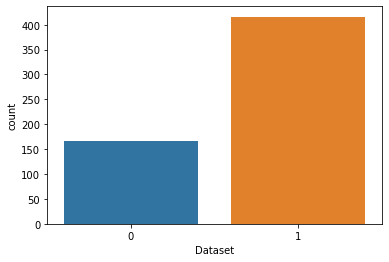

In [11]:
# visualize number of patients diagonised with liver diesease
sns.countplot(data = records, x = 'Dataset');

p1, p2 = records['Dataset'].value_counts()
print('Number of people diagonised with liver disease: ', p1)
print('Number of people not diagonised with liver disease: ', p2)

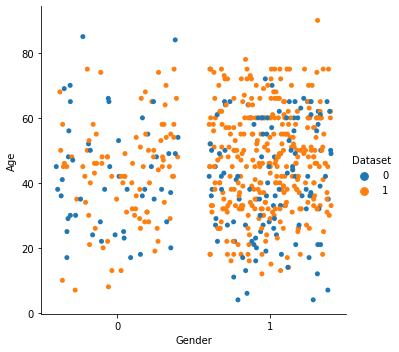

In [12]:
sns.catplot(data = records, x = 'Gender', y = 'Age', hue = 'Dataset', jitter = 0.4);

From the above plot we can see that Male and older people are more prone to liver diseases.

### Checking the impact of Total_Bilirubin on Dataset

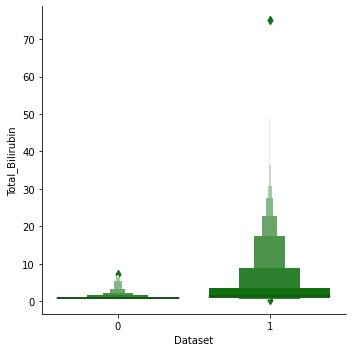

In [13]:
sns.catplot(x='Dataset', y='Total_Bilirubin', data=records, kind = 'boxen', color = 'green');

### Checking the impact of Direct_Bilirubin on Dataset

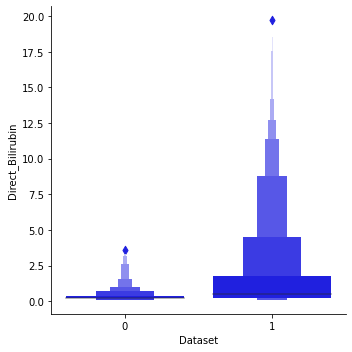

In [14]:
sns.catplot(x='Dataset', y='Direct_Bilirubin', data=records, kind = 'boxen', color = 'blue');

### Checking the impact of Alkaline_Phosphotase on Dataset

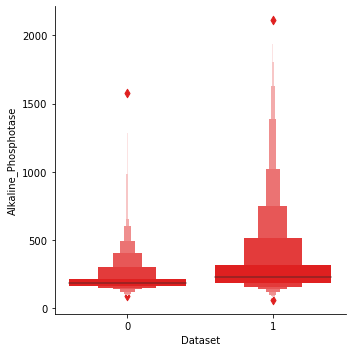

In [15]:
sns.catplot(x='Dataset', y='Alkaline_Phosphotase', data=records, kind = 'boxen', color = 'red');

### Checking the impact of Alamine_Aminotransferase on Dataset

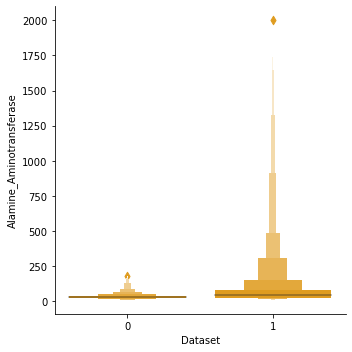

In [16]:
sns.catplot(x='Dataset', y='Alamine_Aminotransferase', data=records, kind = 'boxen', color = 'orange');

### Checking the impact of Aspartate_Aminotransferase on Dataset

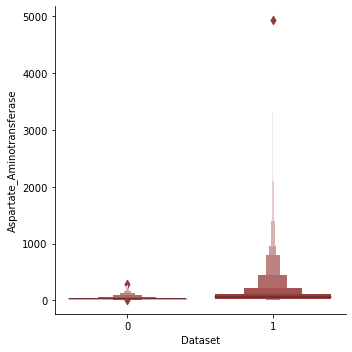

In [17]:
sns.catplot(x='Dataset', y='Aspartate_Aminotransferase', data=records, kind = 'boxen', color = 'brown');

### Checking the impact of Total_Protiens on Dataset

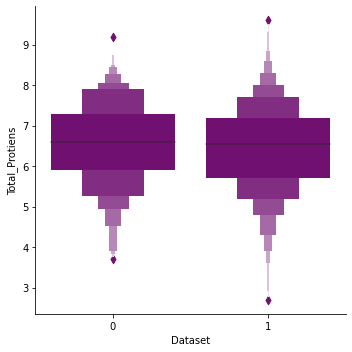

In [18]:
sns.catplot(x='Dataset', y='Total_Protiens', data=records, kind = 'boxen', color = 'purple');

### Checking the impact of Albumin on Dataset

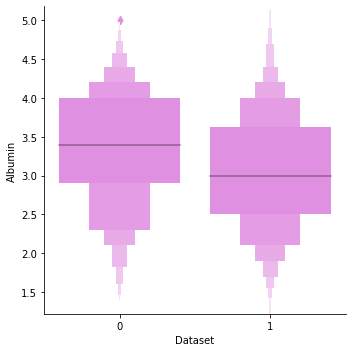

In [19]:
sns.catplot(x='Dataset', y='Albumin', data=records, kind = 'boxen', color = 'violet');

### Checking the impact of Albumin_and_Globulin_Ratio on Dataset

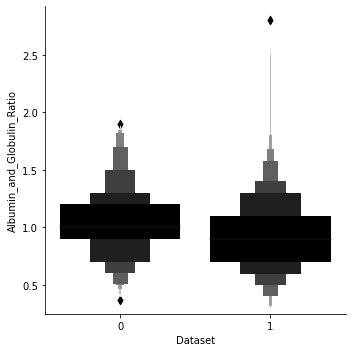

In [20]:
sns.catplot(x='Dataset', y='Albumin_and_Globulin_Ratio', data=records, kind = 'boxen', color = 'black');

### Heatmap of correlation between features

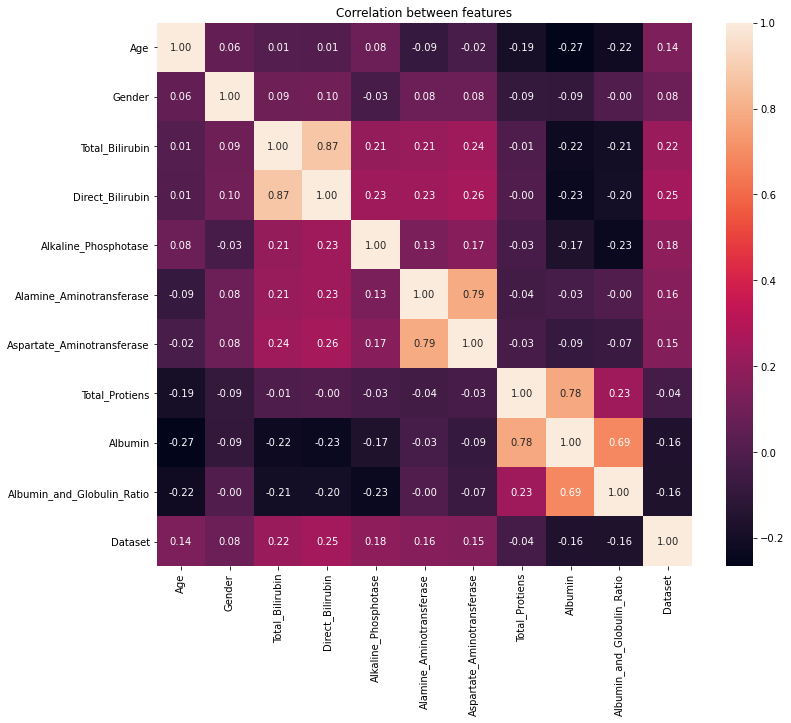

In [21]:
plt.figure(figsize=(12, 10))
plt.title('Correlation between features');
sns.heatmap(records.corr(), annot = True, fmt = '0.2f');

## Machine Learning

In [22]:
# import the required modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
data = records.values
X = data[:, :-1]
Y = data[:, -1]

### Scale the values using MinMaxScaler

In [24]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Get the training and test data using train_test_split

In [25]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.3, random_state = 123)
Y_train = Y_train.reshape(408, 1)
Y_test = Y_test.reshape(175, 1)
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))
print("Y_test shape:" + str(Y_test.shape))

X_train shape:(408, 10)
Y_train shape:(408, 1)
X_test shape:(175, 10)
Y_test shape:(175, 1)


### 1. Using Logistic Regression

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# train and test scores
lr_train_score = round(logreg.score(X_train, Y_train) * 100, 2)
lr_test_score = round(logreg.score(X_test, Y_test) * 100, 2)
# predicted output
Y_pred_lr = logreg.predict(X_test)

print('Logistic Regression train score: ', lr_train_score)
print('Logistic Regression test score: ', lr_test_score)
print('Classification Report: \n', classification_report(Y_test, Y_pred_lr))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred_lr))

Logistic Regression train score:  70.34
Logistic Regression test score:  72.57
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.02      0.04        49
         1.0       0.72      1.00      0.84       126

    accuracy                           0.73       175
   macro avg       0.86      0.51      0.44       175
weighted avg       0.80      0.73      0.62       175

Confusion Matrix:
 [[  1  48]
 [  0 126]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### 2. Using Random Forest Classifier

In [27]:
rf_cl = RandomForestClassifier()
rf_cl.fit(X_train, Y_train)

# train and test scores
rf_train_score = round(rf_cl.score(X_train, Y_train) * 100, 2)
rf_test_score = round(rf_cl.score(X_test, Y_test) * 100, 2)
# predicted output
Y_pred_rf = rf_cl.predict(X_test)

print('Random Forest train score: ', rf_train_score)
print('Random Forest test score: ', rf_test_score)
print('Classification Report: \n', classification_report(Y_test, Y_pred_rf))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred_rf))

<ipython-input-27-22d19489822b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_cl.fit(X_train, Y_train)


Random Forest train score:  100.0
Random Forest test score:  71.43
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.48      0.27      0.34        49
         1.0       0.76      0.89      0.82       126

    accuracy                           0.71       175
   macro avg       0.62      0.58      0.58       175
weighted avg       0.68      0.71      0.68       175

Confusion Matrix:
 [[ 13  36]
 [ 14 112]]


### 3. Using Support Vector Machines

In [28]:
svm_cl = svm.SVC()
svm_cl.fit(X_train, Y_train)

# train and test scores
svm_train_score = round(svm_cl.score(X_train, Y_train) * 100, 2)
svm_test_score = round(svm_cl.score(X_test, Y_test) * 100, 2)
# predicted output
Y_pred_svm = svm_cl.predict(X_test)

print('SVM train score: ', svm_train_score)
print('SVM score: ', svm_test_score)
print('Classification Report: \n', classification_report(Y_test, Y_pred_svm))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred_svm))

SVM train score:  71.08
SVM score:  72.0
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        49
         1.0       0.72      1.00      0.84       126

    accuracy                           0.72       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.52      0.72      0.60       175

Confusion Matrix:
 [[  0  49]
 [  0 126]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
